<a href="https://colab.research.google.com/github/KnzMcn/Monkeypox-Using-Autoencoders/blob/main/Dataset_Import_Original_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Another attempt at building an autoencoder as a classifier

# Import the libraries

In [ ]:
#if image_dataset_loader is not available uncomment the line below
!pip install image-dataset-loader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import image_dataset_loader

# Import the dataset

In [ ]:
#the commented code below only works on local source, change it as needed
#(X_train, y_train), (X_test, y_test), (X_val, y_val) = image_dataset_loader.load("C:/Users/TOSHIBA_2/Documents/College/3rd - First Sem/Machine Learning/Codes/Learning Evidence/Fold1", ['Train', 'Test', 'Val'])

In [ ]:
#using Gdrive to import the dataset into Google Colab
#will ask for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#if /tmp has contents or repeating Fold1 contents, delete using the line below
#%rm -rf /tmp/Fold1

In [ ]:
#unzip the desired folder and extract the contents into the tmp folder
#edit the first one depending on where the zipfile is stored in your Gdrive
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/3rd year/Machine Learning/Learning Evidence/Fold1.zip', 'r') #Opens the file in read mode
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#resize the image for faster processing
#no need to edit the next line, it will just overwrite the original data with the resized data
#but if you're working locally, change it according to the path of the dataset
main_directory = '/tmp/Fold1/Fold1/'

for subdir, dirs, files in os.walk(main_directory):
  for file in files:
    filepath = os.path.join(subdir, file)

    if filepath.endswith('.jpg'):
      im = Image.open(filepath)
      imResize = im.resize((75, 75), Image.ANTIALIAS)
      imResize.save(filepath, 'JPEG', quality=90)

In [ ]:
#import the images and divide them according to their folders
#label_test/train/val is for original labels that is without one hot encoding
(X_train, label_train), (X_test, label_test), (X_val, label_val) = image_dataset_loader.load('/tmp/Fold1/Fold1', ['Train', 'Test', 'Val'])

In [ ]:
#print the shape of each set
print("X_train shape: {}\nlabel_train shape: {}".format(X_train.shape, label_train.shape))
print("\nX_test shape: {}\nlabel_test shape: {}".format(X_test.shape, label_test.shape))
print("\nX_val shape: {}\nlabel_val shape: {}".format(X_val.shape, label_val.shape))

X_train shape: (2142, 75, 75, 3)
label_train shape: (2142,)

X_test shape: (45, 75, 75, 3)
label_test shape: (45,)

X_val shape: (420, 75, 75, 3)
label_val shape: (420,)


In [ ]:
#create dictionary of target classes
label_dict = {
    0: 'Monkeypox',
    1: 'Others'
}

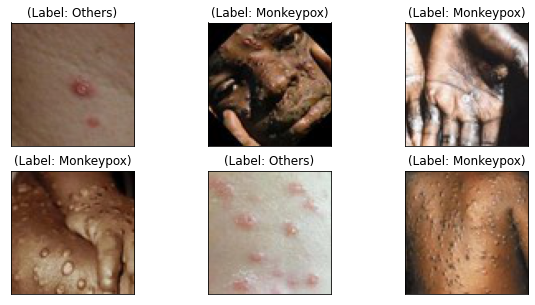

In [ ]:
#display images
plt.figure(figsize = [10, 5])

n = 3 #how many images to display
for i in range(n):
    #training images
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_train[i].reshape(75, 75, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    curr_lbl = label_train[i]
    plt.title("(Label: " + str(label_dict[curr_lbl]) +")")

    #testing images
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(X_test[i].reshape(75, 75, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    curr_lbl = label_test[i]
    plt.title("(Label: " + str(label_dict[curr_lbl]) +")")
plt.show()

In [ ]:
#print the labels for each set
print("Labels for label_train: {}".format(label_train[:5]))
print("Labels for label_test: {}".format(label_test[:5]))
print("Labels for label_val: {}".format(label_val[:5]))

Labels for label_train: [1 0 0 1 1]
Labels for label_test: [0 1 0 1 1]
Labels for label_val: [0 1 1 1 0]


# Preprocessing

In [ ]:
#cleaning and reshaping the data
X_train = X_train.astype('float32') / 255
X_train = np.reshape(X_train, (len(X_train), 75, 75, 3))
X_test = X_test.astype('float32') / 255
X_test = np.reshape(X_test, (len(X_test), 75, 75, 3))
X_val = X_val.astype('float32') / 255
X_val = np.reshape(X_val, (len(X_val), 75, 75, 3))